# K- Nearest Neighbor (KNN) Algorithm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
data = pd.read_csv('activity 8.csv')
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
data.shape

(150, 5)

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = data[feature_columns].values
y = data['species'].values
#Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
train,test=train_test_split(data,test_size=0.2,random_state=0)

### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNC

#### model building for k=3

In [17]:
neigh=KNC(n_neighbors=3)
neigh.fit(train.iloc[:,0:4],train.iloc[:,4])
train_predict=neigh.predict(train.iloc[:,0:4])
pd.crosstab(train_predict,train.iloc[:,4])
train_acc=(39+34+41)/(39+34+41+3+3)
train_acc

0.95

##### another way for calculating accuracy

In [18]:
train_acc=np.mean(neigh.predict(train.iloc[:,0:4])==train.iloc[:,4])
train_acc

0.95

### To find best k value for building best model

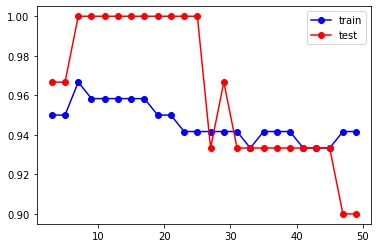

In [19]:
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:4],train.iloc[:,4])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:4])==train.iloc[:,4])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4])
    acc.append([train_acc,test_acc])
    
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [20]:
neigh8=KNC(n_neighbors=8)
neigh8.fit(train.iloc[:,0:4],train.iloc[:,4])

train_acc8=np.mean(neigh8.predict(train.iloc[:,0:4])==train.iloc[:,4])
train_acc8
test_acc8=np.mean(neigh8.predict(test.iloc[:,0:4])==test.iloc[:,4])
test_acc8

1.0